In [1]:
path='datasets/bitly_usagov/example.txt'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [2]:
import json
path = 'datasets/bitly_usagov/example.txt'
records = [json.loads(line) for line in open(path, encoding='utf-8')]

In [3]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [4]:
# 표준 시간대 목록 가져오기
# 기준 : 가잔 빈도가 높은 표준 시간대(tz 필드)
time_zones = [rec['tz'] for rec in records]

# 오류 발생 : records의 아이템이 모두 표준시간대 필드를 가지고 있는 건 아니다.

KeyError: 'tz'

In [5]:
# if 'tz' in rec으로 tz 필드가 있는지 검사
time_zones=[rec['tz'] for rec in records if 'tz'in rec] # tz 컬럼을 가지고 있는 행을 추려서 tz값을 time_zones에 넣는다.

time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [6]:
# 빈값을 제거하지 않고 표준시간대 확인
def get_counts(sequence):
    counts={}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [7]:
# 파이썬 라이브러리 이용
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # 값이 0으로 초기화된다.
    for x in sequence:
        counts[x] += 1
    return counts

In [8]:
# 재사용이 쉽도록 만든 함수에 time_zones 리스트를 넘겨서 사용
counts = get_counts(time_zones)

counts['America/New_York']

1251

In [9]:
len(time_zones)

3440

In [10]:
# 가장 많이 등장하는 상위10개 표준시간대 확인 -> 사전 이용
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [11]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [12]:
# 지금까지 했던 작업을 collections.Counter 클래스를 이용하여 간단히 작성하기
from collections import Counter

counts = Counter(time_zones)
counts.most_common(10) # 가장 많이 등장하는 10개 출력

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [13]:
# records를 DataFrame으로 만들기
import pandas as pd

frame=pd.DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [14]:
frame['tz'][:10] # 처음부터 인덱스가 10 전까지

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [15]:
# frame['tz']에서 반환되는 Series 객체에는 value_counts 메서드를 이용해서 시간대 개수 세기
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [16]:
# matplotlib 라이브러리를 이용하여 데이터를 그래프로 표현
# 그 전에 빈 데이터 값을 다른 이름으로 변경
clean_tz=frame['tz'].fillna('Missing') # fillna 함수로 빈 값을 대체 -> NON
clean_tz[clean_tz == ''] = 'Unknown' # ''
tz_counts=clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

<AxesSubplot:>

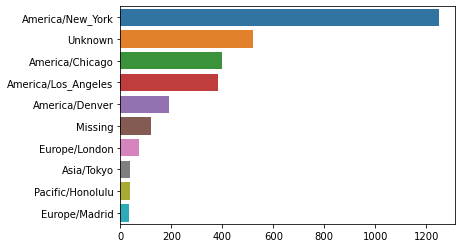

In [17]:
# 수평 그래프 그리기
import seaborn as sns

subset = tz_counts[:10]
sns.barplot(y=subset.index, x=subset.values)

In [18]:
# a 필드 : URL 단축을 실행하는 브라우저, 단말기, 애플리케이션에 대한 정보가 들어있다.
frame['a'][1]

'GoogleMaps/RochesterNY'

In [19]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [20]:
frame['a'][51][:50] # 'a'컬럼에 해당하는 51번째 데이터를 처음부터 50인덱스까지만 출력

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [21]:
# a 컬럼의 데이터 문자열에서 첫 번째 토큰(브라우저의 종류를 어느정도 알 수 있을 만큼)을 잘라내서 사용자 행동에 대한 또다른 개요 만들기
results = pd.Series([x.split()[0] for x in frame.a.dropna()])
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [22]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [23]:
import numpy as np

In [24]:
# 표준시간대 순위표릴 윈도우 사용자와 비윈도우 사용자 그룹으로 나누기
# a 컬럼 데이터에 'Windows'를 포함하면 윈도우 사용자라고 가정
# agent 값이 없는 데이터는 제거 후 cframe에 저장
cframe = frame[frame.a.notnull()]

In [39]:
cframe['os'] = np.where(cframe['a'].str.contains('Windows'),'Windows', 'Not Windows')
# str.contains() : 지정한 문자열이 포함되어 있는지 확인
cframe['os'][:5]

C:\Users\kjhjh\anaconda3\envs\kjh-3.7-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [26]:
# 표준시간대와 운영체제를 기준으로 데이터를 그룹으로 묶는다.
by_tz_os=cframe.groupby(['tz','os'])

In [27]:
# size 함수로 그룹별 합계 계산
# nustack 함수를 이용해 표로 재배피
agg_counts = by_tz_os.size().unstack().fillna(0) # unstack은 왼->오 / stack은 위 ->아래
agg_counts[:10]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [28]:
# 전체 표준시간대의 순위
# 오름차순으로 정렬
indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [34]:
# take를 사용해서 로우를 정렬된 순서 그대로 선택하고 마지막 10개 로우만 출력
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [35]:
# pandas에는 이와 똑같은 동작을 하는 nlargest라는 편리한 메서드 존재
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [41]:
# plot함수에 stacked=True를 넘겨주면 데이터를 중첩 막대그래프로 만들 수 있다.
# 시각화를 위해 데이터 재배치
count_subset=count_subset.stack()
count_subset.name='total'
count_subset=count_subset.reset_index()
count_subset[:10]

sns.barplot(x='total', y='tz',  hue='os', data=count_subset)

ValueError: Could not interpret input 'tz'

In [38]:
def norm_total(group):
    group['normed_total'] = group.total/group.total.sum()
    return group

results=count_subset.groupby('tz').apply(norm_total)

KeyError: 'tz'

In [42]:
g=count_subset.groupby('tz')
results2=count_subset.total/g.total.transform('sum')

KeyError: 'tz'